# Economic Indicators

This code file is meant to capture the relevant economic indicators for plotting and analysis.

Outstanding tasks include:
* Add data for more economic indicators from the remaining Fed districts
* Uncover how to set the major ticks 1 yr apart
* Clean up the code
* Perform time series lag correlation analysis

In [27]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

In [17]:
empire_df = pd.read_csv('./Inputs/ESMS_SeasonallyAdjusted_Diffusion.csv')
empire_clean_df = empire_df[['surveyDate','GACDISA']]
empire_clean_df = empire_clean_df.rename(columns={
    "surveyDate":"Date",
    "GACDISA":"Empire_St"
})
empire_clean_df = empire_clean_df.set_index(['Date'])
empire_clean_df

,Empire_St
Date,
2001-07-31,-13.3
2001-08-31,-8.0
2001-09-30,-12.5
2001-10-31,-14.7
2001-11-30,-21.5
...,...
2021-04-30,26.3
2021-05-31,24.3
2021-06-30,17.4


In [22]:
empire_clean_df.index = pd.to_datetime(empire_clean_df.index)

In [24]:
empire_clean_df

,Empire_St
Date,
2001-07-31,-13.3
2001-08-31,-8.0
2001-09-30,-12.5
2001-10-31,-14.7
2001-11-30,-21.5
...,...
2021-04-30,26.3
2021-05-31,24.3
2021-06-30,17.4


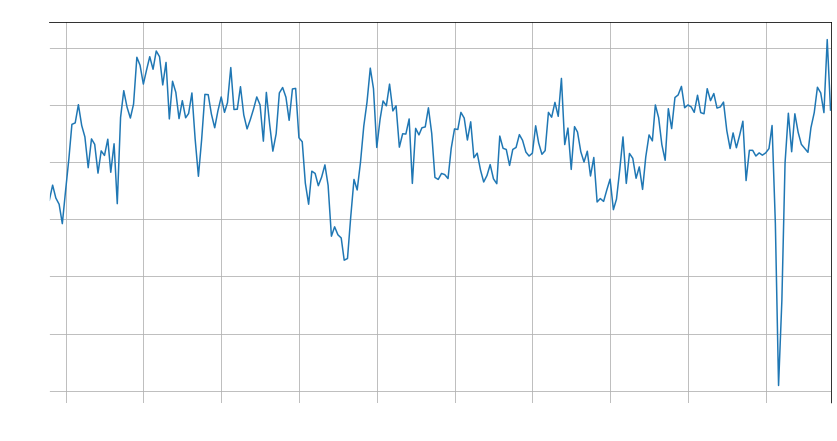

<Figure size 432x288 with 0 Axes>

In [47]:
# Convert start and end date to datetime for plotting purposes
# start_date_obj = datetime.strptime(empire_clean_df.index[0], '%Y-%m-%d')
# end_date_obj = datetime.strptime(empire_clean_df.index[-1], '%Y-%m-%d')
start_date_obj = empire_clean_df.index[0]
end_date_obj = empire_clean_df.index[-1]

# Plot tickers v performance
# empire_clean_df.plot.line(figsize=(15,5),
#                             title='Empire State Business Conditions',
#                             ylabel='Business Conditions Index')
# # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.xlim(start_date_obj,end_date_obj)
# # plt.plot_date(empire_clean_df.index, empire_clean_df.Empire_St, fmt='y')
# plt.grid(color='grey',linestyle='--',linewidth=0.5,alpha=0.8)
# plt.show()

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_xlabel('Years')
ax.set_ylabel('Business Conditions Index')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Empire State Business Conditions",color='w')
plt.xlim(start_date_obj,end_date_obj)
plt.plot(empire_clean_df)
plt.grid()
plt.show()
plt.tight_layout()

In [31]:
start_date_obj

Timestamp('2001-07-31 00:00:00')